In [1]:
'''
    Author: A.Shrikant
'''

'\n    Author: A.Shrikant\n'

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [103]:
os.getcwd()

'C:\\Users\\user\\Documents\\Statistics_and_ML'

In [104]:
df = pd.read_csv('dataset/boston.csv')

In [105]:
# Attribute Information:
# Input features in order:
# 1) CRIM: per capita crime rate by town
# 2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
# 3) INDUS: proportion of non-retail business acres per town
# 4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# 5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
# 6) RM: average number of rooms per dwelling
# 7) AGE: proportion of owner-occupied units built prior to 1940
# 8) DIS: weighted distances to five Boston employment centres
# 9) RAD: index of accessibility to radial highways
# 10) TAX: full-value property-tax rate per $10,000 [$/10k]
# 11) PTRATIO: pupil-teacher ratio by town
# 12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# 13) LSTAT: % lower status of the population

# Output variable:
# 1) MEDV: Median value of owner-occupied homes in $1000's [k$]

In [106]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [107]:
df.shape

(506, 14)

In [108]:
df.drop_duplicates()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## No missing values detected.

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Handling Outliers:

In [9]:
def handle_outliers_using_emperical_rule(col):
    upper_cutoff = col.mean() + 3*col.std()
    lower_cutoff = col.mean() - 3*col.std()
    return np.where(col > upper_cutoff, upper_cutoff, np.where(col < lower_cutoff, lower_cutoff, col))

In [10]:
def handle_outliers_using_iqr(col):
    q1 = np.quantile(col, .25)
    q3 = np.quantile(col, .75)
    
    iqr = q3 - q1
    
    upper_limit = q3 + iqr * 1.5
    lower_limit = q1 - iqr * 1.5
    
    print(f'q1: {q1}')
    print(f'q3: {q3}')
    print(f'iqr: {iqr}')
    
    return np.where(col > upper_limit, upper_limit, np.where(col < lower_limit, lower_limit, col))

In [11]:
def draw_distplot_and_boxplot(col, outliers_treated = False):
    
    word = "Before"
    
    if outliers_treated:
        word = "After"
    
    plt.figure(figsize=(14,5))

    plt.subplot(1,2,1)
    sns.distplot(col)
    plt.title(f'{word} treating outliers')

    plt.subplot(1,2,2)
    sns.boxplot(y=col)
    plt.ylabel(col.name)

    plt.title(f'{word} treating outliers')

### Handling outliers for 'CRIM'

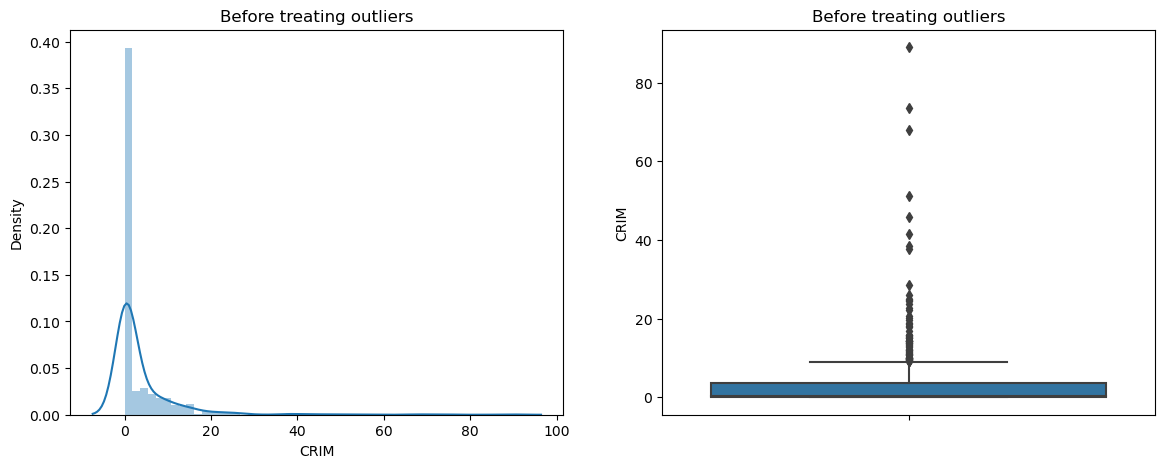

In [12]:
draw_distplot_and_boxplot(df['CRIM'])

q1: 0.08204499999999999
q3: 3.6770825
iqr: 3.5950375


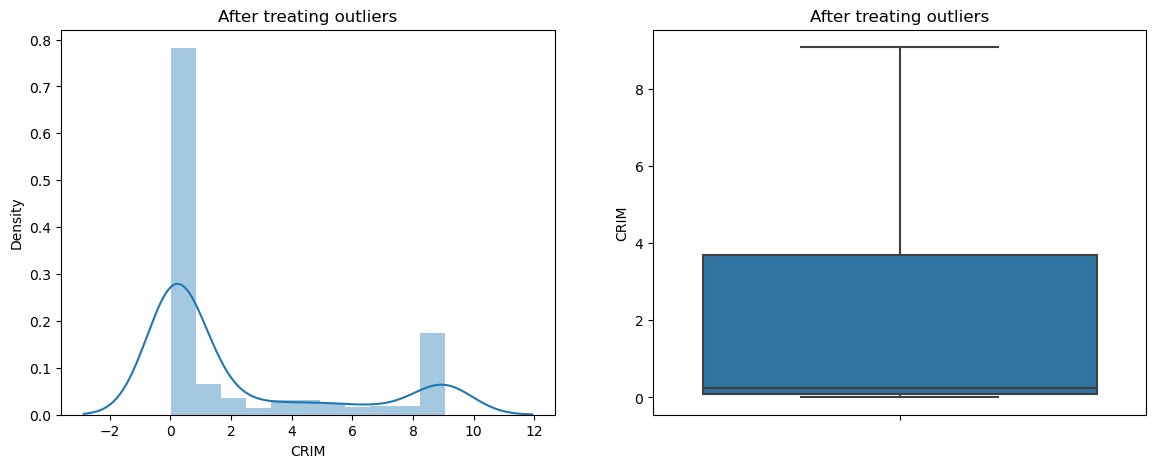

In [13]:
# Since 'CRIM' is not normally distributed so we use the IQR based approach to treat outliers.

col_name = 'CRIM'

df[col_name] = handle_outliers_using_iqr(df[col_name])
draw_distplot_and_boxplot(df[col_name], outliers_treated=True)

### Handling outliers for 'ZN'

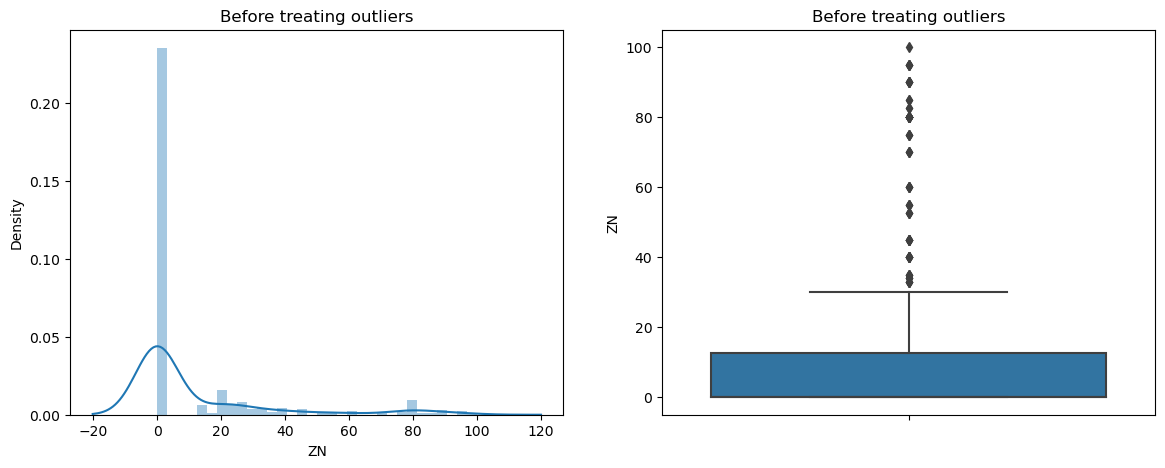

In [14]:
draw_distplot_and_boxplot(df['ZN'])

q1: 0.0
q3: 12.5
iqr: 12.5


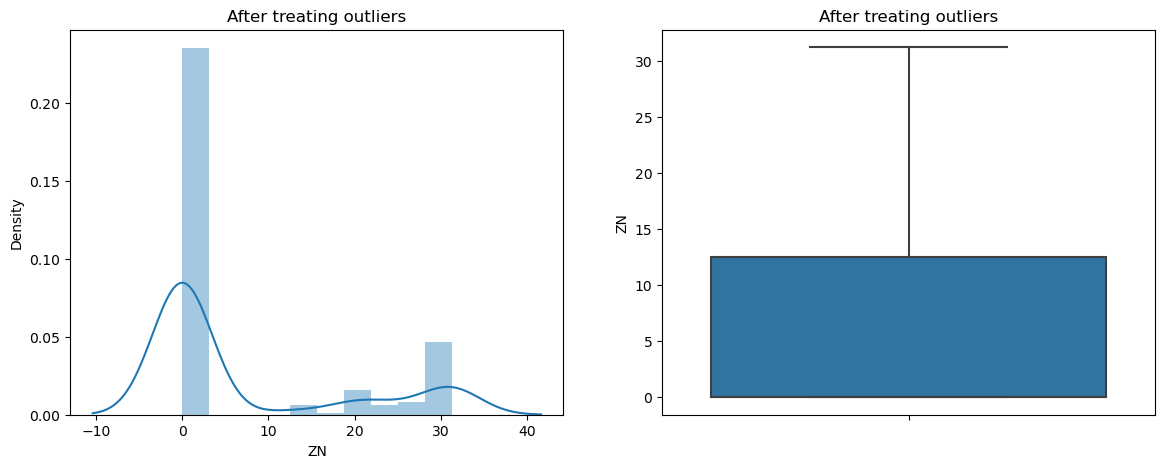

In [15]:
# Since 'ZN' is not normally distributed so we use the IQR based approach to treat outliers.

col_name = 'ZN'

df[col_name] = handle_outliers_using_iqr(df[col_name])
draw_distplot_and_boxplot(df[col_name], outliers_treated=True)

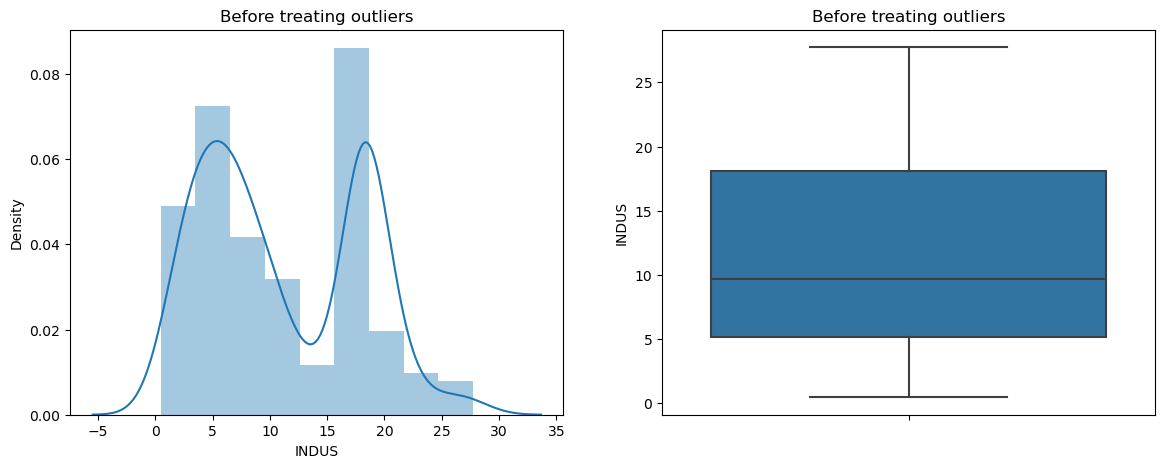

In [16]:
draw_distplot_and_boxplot(df['INDUS'])

### No outliers detected for 'INDUS'.

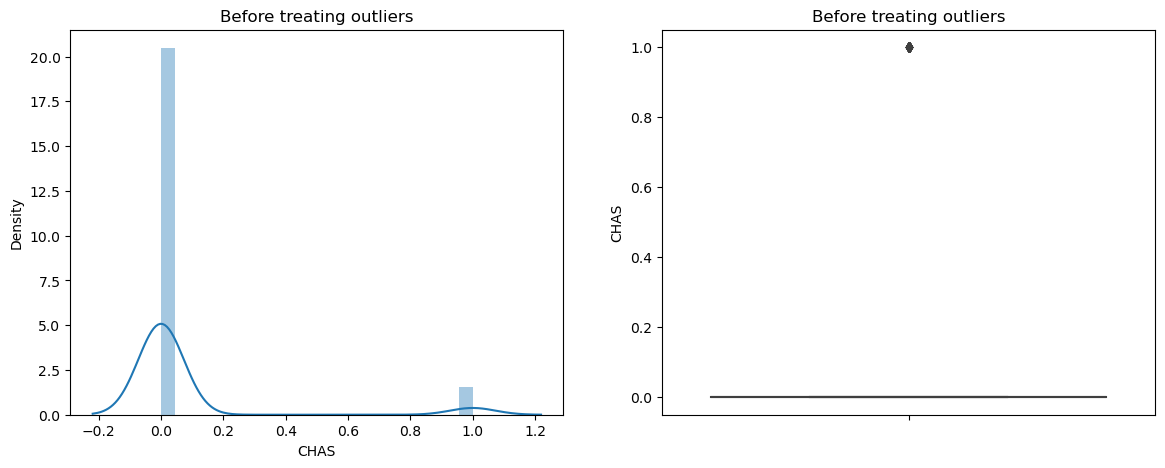

In [17]:
draw_distplot_and_boxplot(df['CHAS'])

### Range for 'CHAS' is very narrow so we chose not to treat the outliers.

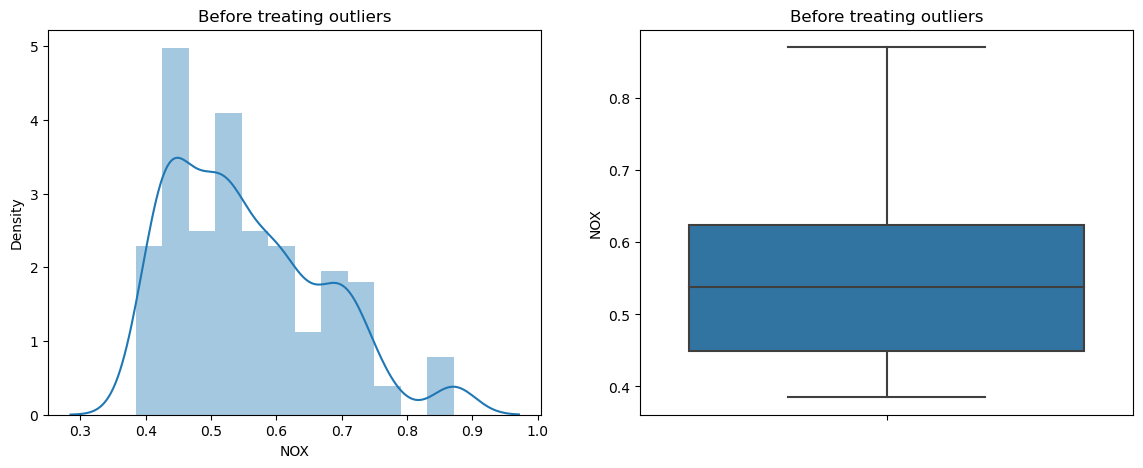

In [18]:
draw_distplot_and_boxplot(df['NOX'])

### No outliers detected for 'NOX'.

### Handling outliers for 'RM'

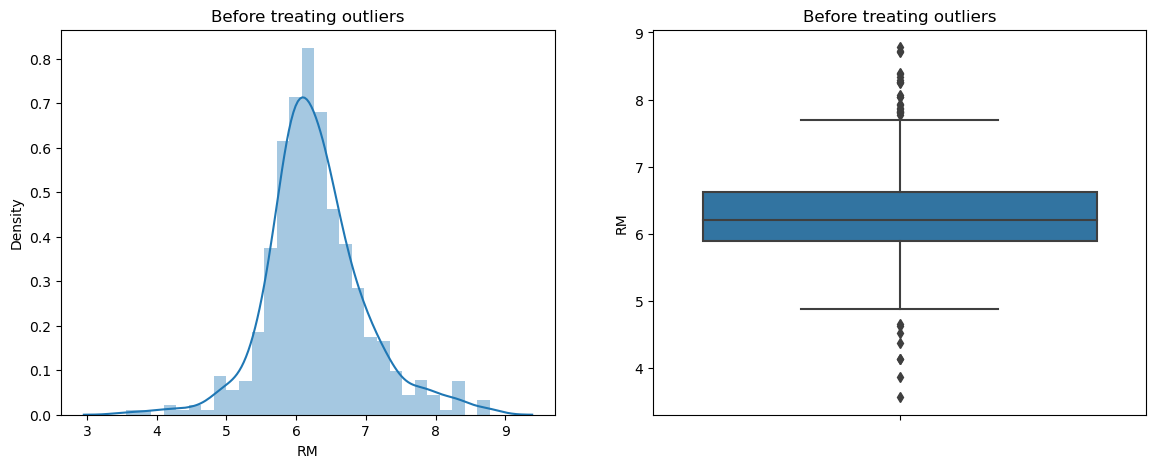

In [19]:
draw_distplot_and_boxplot(df['RM'])

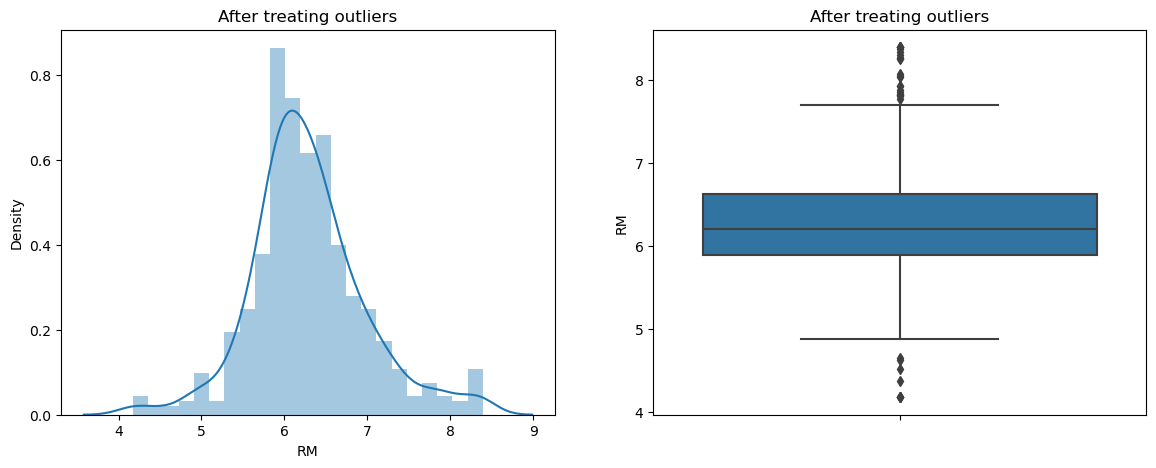

In [20]:
# Since 'RM' is normally distributed so we use the Emperical Rule based approach to treat outliers.

col_name = 'RM'

df[col_name] = handle_outliers_using_emperical_rule(df[col_name])
draw_distplot_and_boxplot(df[col_name], outliers_treated=True)

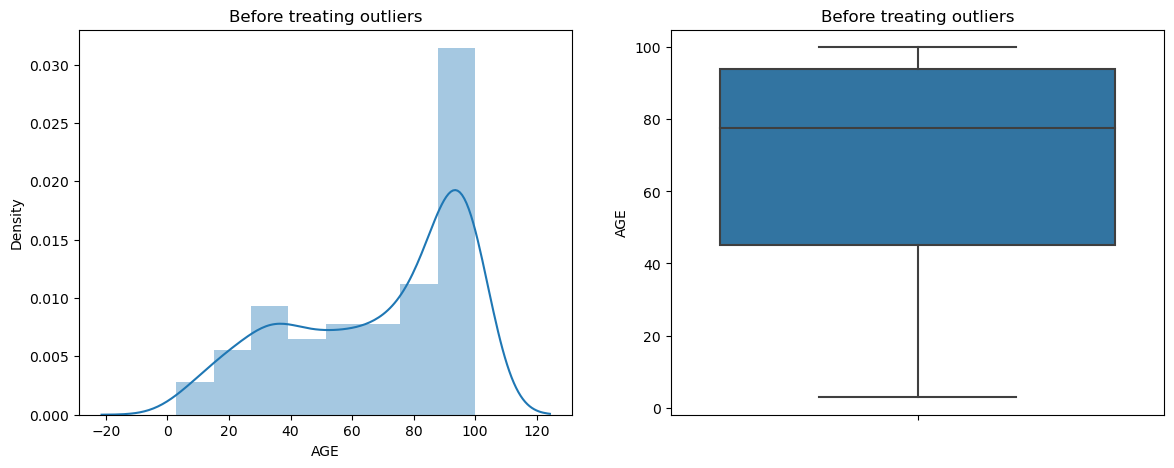

In [21]:
draw_distplot_and_boxplot(df['AGE'])

### No outliers detected for 'AGE'.

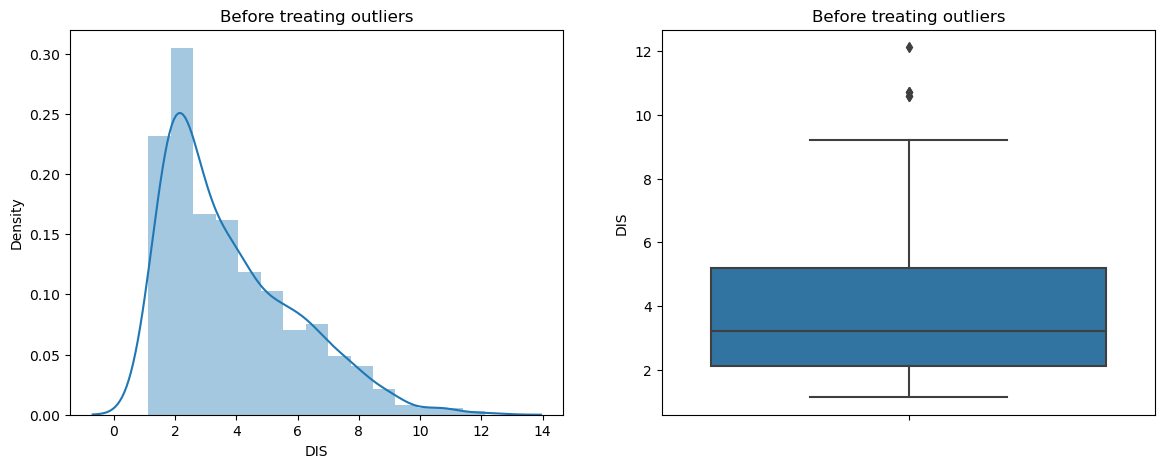

In [22]:
draw_distplot_and_boxplot(df['DIS'])

q1: 2.100175
q3: 5.1884250000000005
iqr: 3.0882500000000004


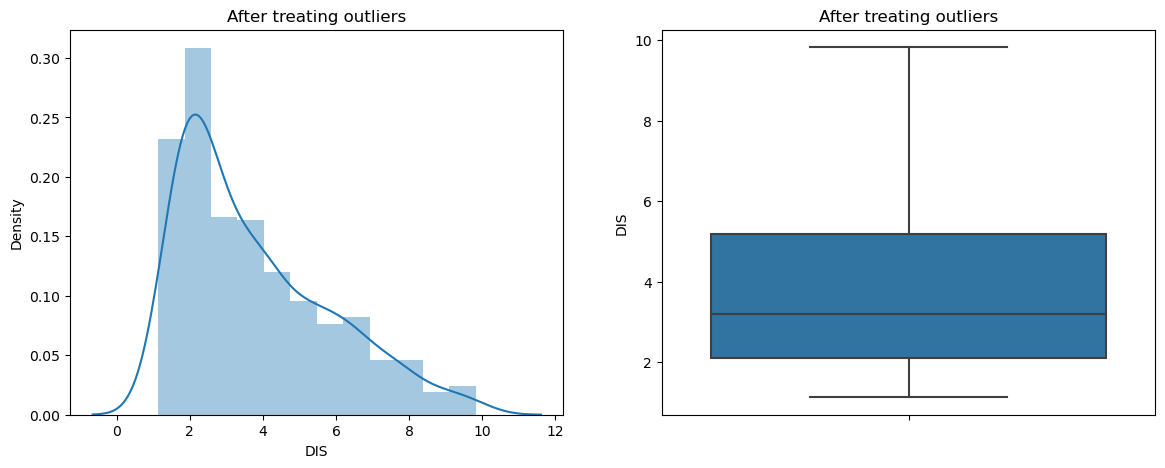

In [23]:
# Since 'DIS' is not normally distributed so we use the IQR based approach to treat outliers.

col_name = 'DIS'

df[col_name] = handle_outliers_using_iqr(df[col_name])
draw_distplot_and_boxplot(df[col_name], outliers_treated=True)

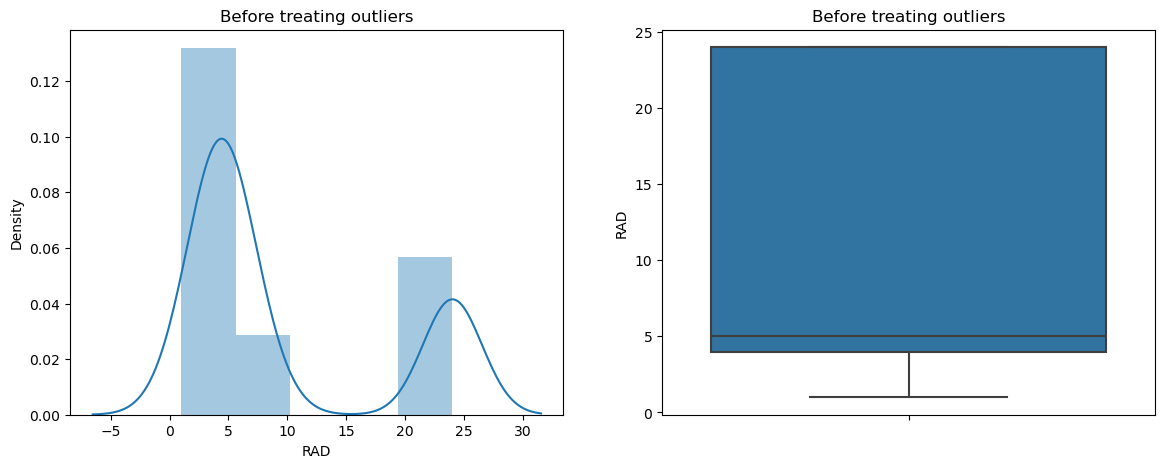

In [24]:
draw_distplot_and_boxplot(df['RAD'])

### No outliers detected for 'RAD'.

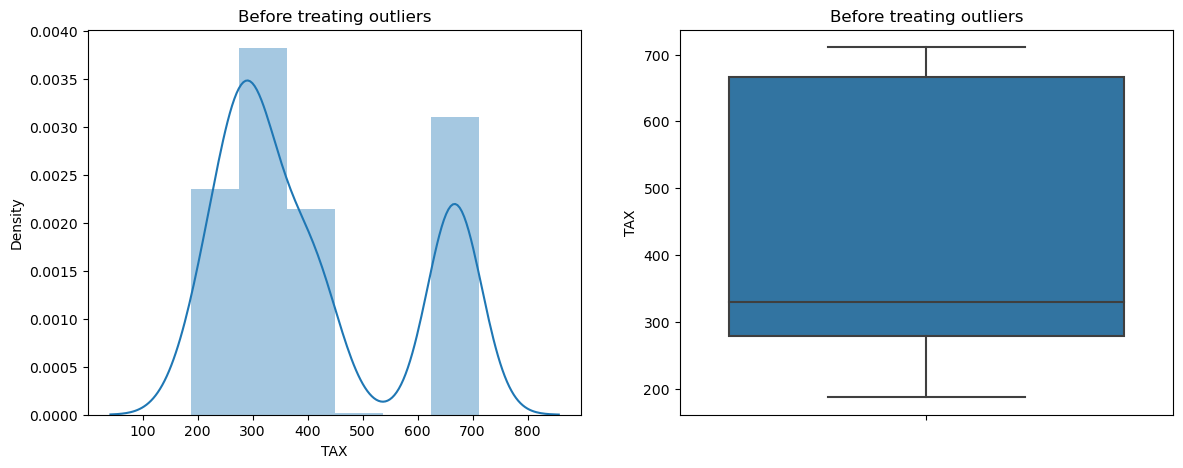

In [25]:
draw_distplot_and_boxplot(df['TAX'])

### No outliers detected for 'TAX'.

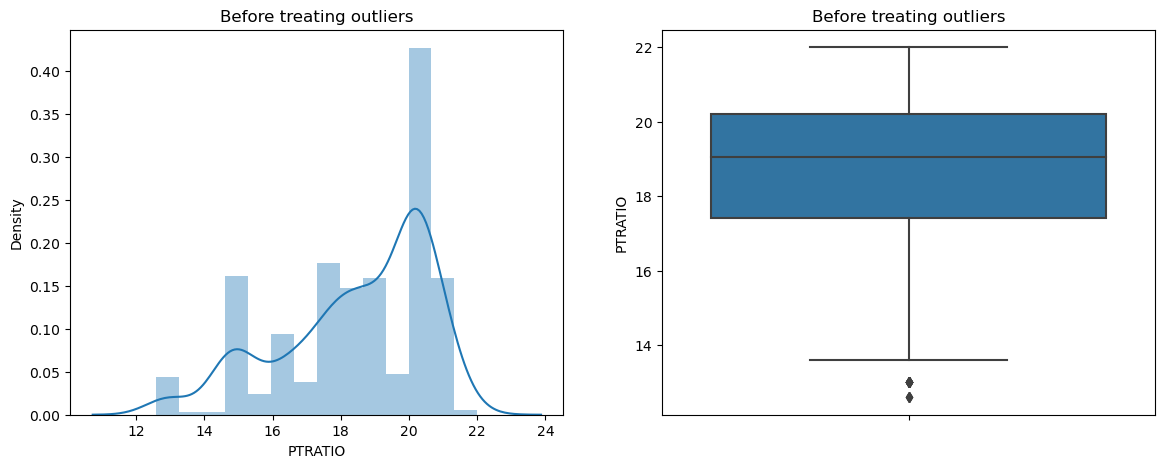

In [26]:
draw_distplot_and_boxplot(df['PTRATIO'])

q1: 17.4
q3: 20.2
iqr: 2.8000000000000007


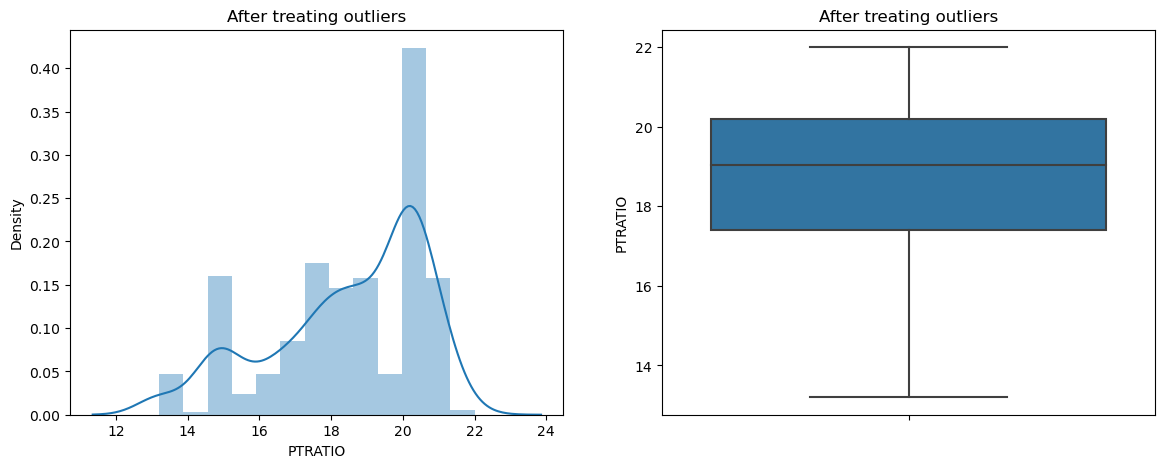

In [27]:
# Since 'PTRATIO' is not normally distributed so we use the IQR based approach to treat outliers.

col_name = 'PTRATIO'

df[col_name] = handle_outliers_using_iqr(df[col_name])
draw_distplot_and_boxplot(df[col_name], outliers_treated=True)

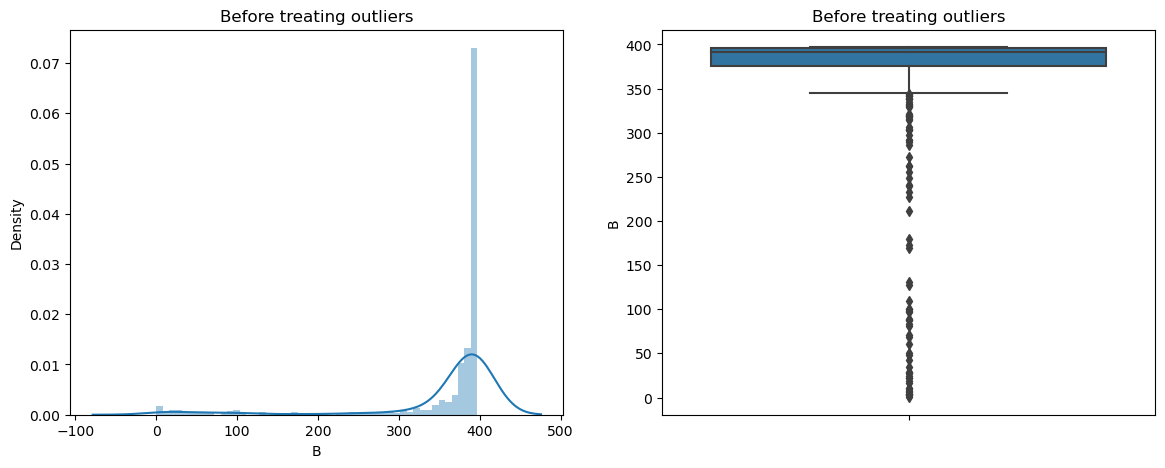

In [28]:
draw_distplot_and_boxplot(df['B'])

q1: 375.3775
q3: 396.225
iqr: 20.847500000000025


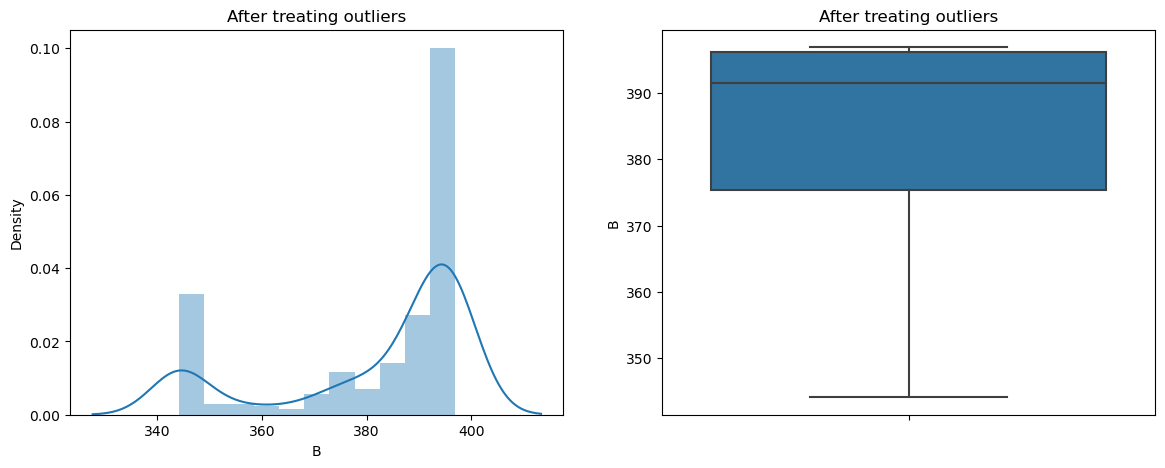

In [29]:
# Since 'B' is not normally distributed so we use the IQR based approach to treat outliers.

col_name = 'B'

df[col_name] = handle_outliers_using_iqr(df[col_name])
draw_distplot_and_boxplot(df[col_name], outliers_treated=True)

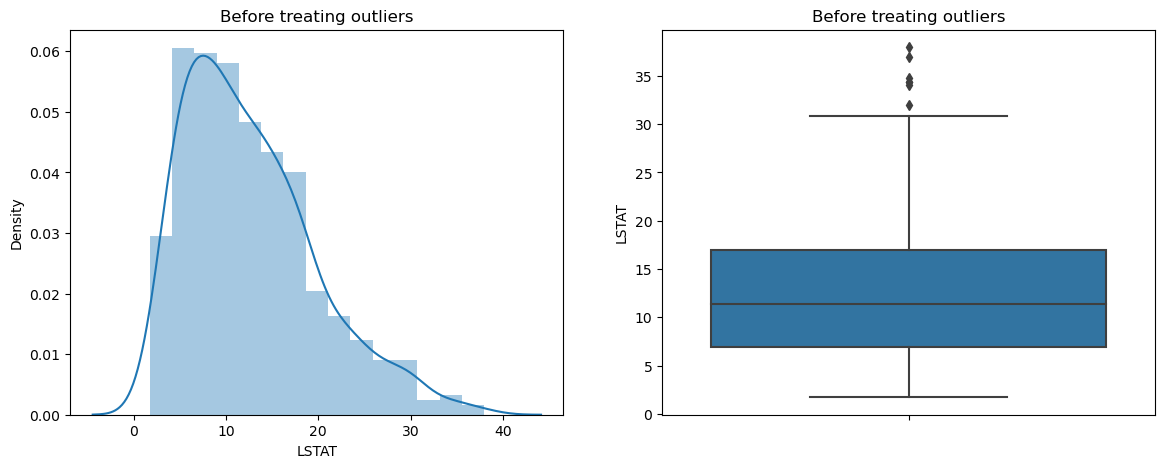

In [30]:
draw_distplot_and_boxplot(df['LSTAT'])

q1: 6.949999999999999
q3: 16.955000000000002
iqr: 10.005000000000003


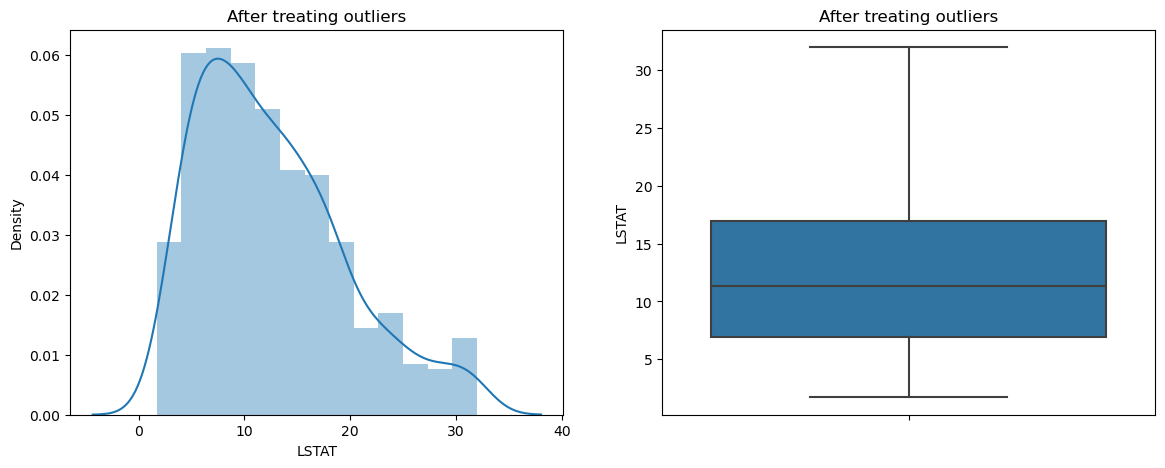

In [31]:
# Since 'LSTAT' is not normally distributed so we use the IQR based approach to treat outliers.

col_name = 'LSTAT'

df[col_name] = handle_outliers_using_iqr(df[col_name])
draw_distplot_and_boxplot(df[col_name], outliers_treated=True)

## No Encoding is required since no categorical variables are there.

# Separating the independent and dependent variables from the dataframe:

In [32]:
x = df.drop('MEDV', axis=1)
y = df.iloc[:, -1:]

In [33]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [34]:
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


## Feature Scaling:

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
sc = StandardScaler()
sc_x = pd.DataFrame(sc.fit_transform(x), columns = x.columns)

In [37]:
sc_x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.670290,0.918420,-1.287909,-0.272599,-0.144217,0.421834,-0.120013,0.148015,-0.982843,-0.666608,-1.477181,0.786988,-1.088749
1,-0.663949,-0.579471,-0.593381,-0.272599,-0.740262,0.198153,0.367166,0.572202,-0.867883,-0.987329,-0.309941,0.786988,-0.495302
2,-0.663955,-0.579471,-0.593381,-0.272599,-0.740262,1.307841,-0.265812,0.572202,-0.867883,-0.987329,-0.309941,0.573183,-1.224272
3,-0.662420,-0.579471,-1.306878,-0.272599,-0.835284,1.036229,-0.809889,1.101820,-0.752922,-1.106115,0.110265,0.667741,-1.379766
4,-0.651339,-0.579471,-1.306878,-0.272599,-0.835284,1.252647,-0.511180,1.101820,-0.752922,-1.106115,0.110265,0.786988,-1.038819
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.653278,-0.579471,0.115738,-0.272599,0.158124,0.447978,0.018673,-0.631298,-0.982843,-0.803212,1.184126,0.529057,-0.419694
502,-0.658523,-0.579471,0.115738,-0.272599,0.158124,-0.239041,0.288933,-0.723719,-0.982843,-0.803212,1.184126,0.786988,-0.503861
503,-0.653843,-0.579471,0.115738,-0.272599,0.158124,1.004275,0.797449,-0.781754,-0.982843,-0.803212,1.184126,0.786988,-0.994596
504,-0.639091,-0.579471,0.115738,-0.272599,0.158124,0.739925,0.736996,-0.674679,-0.982843,-0.803212,1.184126,0.605753,-0.874765


In [38]:
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [39]:
df1 = pd.concat([sc_x, y], axis=1)

In [40]:
df1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.670290,0.918420,-1.287909,-0.272599,-0.144217,0.421834,-0.120013,0.148015,-0.982843,-0.666608,-1.477181,0.786988,-1.088749,24.0
1,-0.663949,-0.579471,-0.593381,-0.272599,-0.740262,0.198153,0.367166,0.572202,-0.867883,-0.987329,-0.309941,0.786988,-0.495302,21.6
2,-0.663955,-0.579471,-0.593381,-0.272599,-0.740262,1.307841,-0.265812,0.572202,-0.867883,-0.987329,-0.309941,0.573183,-1.224272,34.7
3,-0.662420,-0.579471,-1.306878,-0.272599,-0.835284,1.036229,-0.809889,1.101820,-0.752922,-1.106115,0.110265,0.667741,-1.379766,33.4
4,-0.651339,-0.579471,-1.306878,-0.272599,-0.835284,1.252647,-0.511180,1.101820,-0.752922,-1.106115,0.110265,0.786988,-1.038819,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.653278,-0.579471,0.115738,-0.272599,0.158124,0.447978,0.018673,-0.631298,-0.982843,-0.803212,1.184126,0.529057,-0.419694,22.4
502,-0.658523,-0.579471,0.115738,-0.272599,0.158124,-0.239041,0.288933,-0.723719,-0.982843,-0.803212,1.184126,0.786988,-0.503861,20.6
503,-0.653843,-0.579471,0.115738,-0.272599,0.158124,1.004275,0.797449,-0.781754,-0.982843,-0.803212,1.184126,0.786988,-0.994596,23.9
504,-0.639091,-0.579471,0.115738,-0.272599,0.158124,0.739925,0.736996,-0.674679,-0.982843,-0.803212,1.184126,0.605753,-0.874765,22.0


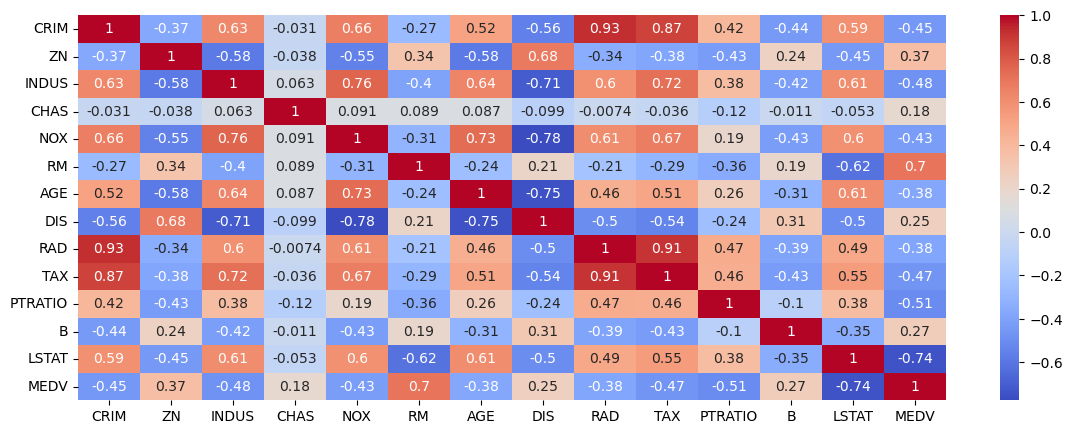

In [41]:
plt.figure(figsize = (14, 5))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.show()

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
df_vif_1 = pd.DataFrame()
number_of_idvs = len(sc_x.columns)
df_vif_1['VIF'] = [variance_inflation_factor(sc_x, i) for i in range(number_of_idvs)]
df_vif_1['Features'] = sc_x.columns

In [44]:
df_vif_1

,VIF,Features
0,9.378575,CRIM
1,2.416138,ZN
2,4.014900,INDUS
3,1.076203,CHAS
4,4.454974,NOX
5,1.938093,RM
6,3.107826,AGE
7,4.091150,DIS
8,12.644869,RAD
9,8.692795,TAX


In [45]:
# Dropping the variable 'RAD' since it has highest vif much greater than 5.

col_names_to_drop_1 = ['RAD']
sc_x1 = sc_x.drop(columns=col_names_to_drop_1)
df2 = df1.drop(columns=col_names_to_drop_1)

In [46]:
df_vif_2 = pd.DataFrame()
number_of_idvs = len(sc_x1.columns)
df_vif_2['VIF'] = [variance_inflation_factor(sc_x1, i) for i in range(number_of_idvs)]
df_vif_2['Features'] = sc_x1.columns

In [47]:
df_vif_2

,VIF,Features
0,5.075773,CRIM
1,2.415039,ZN
2,3.853575,INDUS
3,1.058986,CHAS
4,4.438928,NOX
5,1.925925,RM
6,3.102010,AGE
7,4.091150,DIS
8,5.739788,TAX
9,1.811751,PTRATIO


In [48]:
'''
    Using the OLS approach we first came to know that the regression co-efficents of these columns 'TAX', 'B', 'CRIM', 
    'ZN', 'AGE', 'INDUS' are not significant.
    
    That is how we came to the decsion of removing these variables 'TAX', 'B', 'CRIM', 'ZN', 'AGE', 'INDUS'.
'''
col_names_to_drop_2 = ['TAX', 'B', 'CRIM', 'ZN', 'AGE', 'INDUS']
sc_x2 = sc_x1.drop(columns=col_names_to_drop_2)
df3 = df2.drop(columns=col_names_to_drop_2)

In [49]:
df_vif_3 = pd.DataFrame()
number_of_idvs = len(sc_x2.columns)
df_vif_3['VIF'] = [variance_inflation_factor(sc_x2, i) for i in range(number_of_idvs)]
df_vif_3['Features'] = sc_x2.columns

In [50]:
df_vif_3

,VIF,Features
0,1.045092,CHAS
1,2.985758,NOX
2,1.721501,RM
3,2.629700,DIS
4,1.241742,PTRATIO
5,2.431918,LSTAT


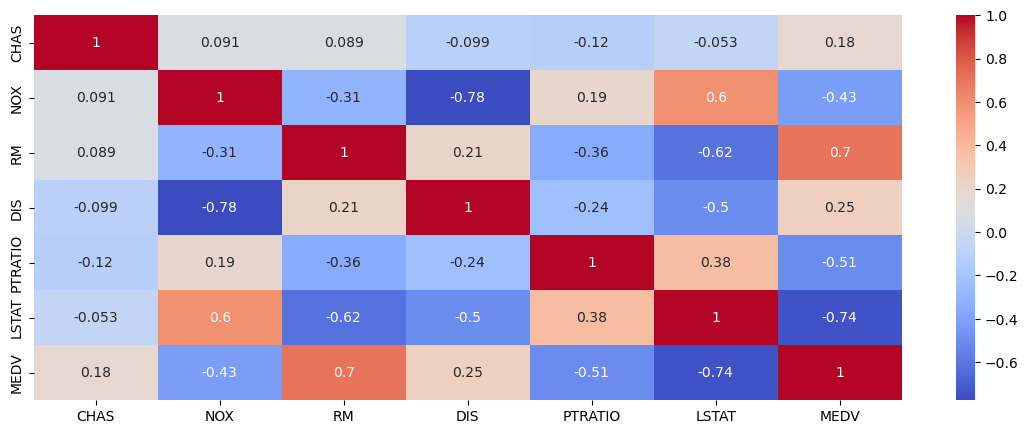

In [51]:
plt.figure(figsize = (14, 5))
sns.heatmap(df3.corr(), annot=True, cmap='coolwarm')
plt.show()

## Splitting the data into train and test datasets:

In [52]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(sc_x2, y, test_size=0.2, random_state=101)

## Building the Multiple Linear Regression based model:

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
linear_model_1 = LinearRegression()
linear_model_1.fit(x_train, y_train)

LinearRegression()

## Testing the Multiple Linear Regression based Model:

In [55]:
y_pred_test = pd.DataFrame(linear_model_1.predict(x_test), columns=y_test.columns, index=y_test.index)
y_pred_train = pd.DataFrame(linear_model_1.predict(x_train), columns=y_train.columns, index=y_train.index)

In [56]:
y_pred_test

,MEDV
195,38.611196
4,28.927656
434,17.851627
458,16.929009
39,28.836229
...,...
227,32.235591
405,12.099323
69,21.483005
231,33.438851


In [57]:
y_test

,MEDV
195,50.0
4,36.2
434,11.7
458,14.9
39,30.8
...,...
227,31.6
405,5.0
69,20.9
231,31.7


# Calculating the Metrics for our MLR based model:

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [59]:
# MAE(Mean Absolute Error) for the DV(MEDV) on test data.
mean_absolute_error(y_test, y_pred_test)

4.273255066580405

In [60]:
# MAE(Mean Absolute Error) for the DV(MEDV) on train data.
mean_absolute_error(y_train, y_pred_train)

3.1831739816783937

In [61]:
# MSE(Mean Squared Error) for the DV(MEDV) on test data.
mse_test = mean_squared_error(y_test, y_pred_test)
mse_test

34.78358077076526

In [62]:
# MSE(Mean Squared Error) for the DV(MEDV) on train data.
mse_train = mean_squared_error(y_train, y_pred_train)
mse_train

20.42030377106413

In [63]:
# RMSE(Root Mean Squared Error) for the DV(MEDV) on test data.
np.sqrt(mse_test)

5.897760657297417

In [64]:
# RMSE(Root Mean Squared Error) for the DV(MEDV) on train data.
np.sqrt(mse_train)

4.51888302250281

In [65]:
r2_score_test = r2_score(y_test, y_pred_test)
r2_score_test

0.6899615851528227

In [66]:
r2_score_train = r2_score(y_train, y_pred_train)
r2_score_train

0.7355481593025808

In [67]:
# Adjusted R2 score for the test data.
# Adjusted R2 score formula:
# adj_r2_score = 1 - ((1-r2_score)*(n-1)/(n-k-1)) where:
# n = number of rows in the test dataset, k = number of IDVs.
k = len(x.columns)
n = len(x_test)
adj_r2_score_test = 1 - ((1-r2_score_test)*(n-1)/(n-k-1))
adj_r2_score_test

0.6441604556867624

In [68]:
# Adjusted R2 score for the train data.
# n = number of rows in the training dataset, k = number of IDVs.
k = len(x.columns)
n = len(x_train)
adj_r2_score_train = 1 - ((1-r2_score_train)*(n-1)/(n-k-1))
adj_r2_score_train

0.726733097946

## Applying Lasso Regression:

In [69]:
from sklearn.linear_model import Lasso

In [70]:
lasso = Lasso(alpha = 0.1)
lasso.fit(x_train, y_train)

Lasso(alpha=0.1)

In [71]:
lasso.coef_

array([ 0.82901359, -1.48097014,  2.95027706, -1.9996023 , -1.89294518,
       -4.2453222 ])

In [72]:
lasso.intercept_

array([22.36113033])

In [73]:
y_pred_test_lasso = lasso.predict(x_test)
y_pred_train_lasso = lasso.predict(x_train)

In [74]:
r2_score(y_test, y_pred_test_lasso)

0.6880207013685942

In [75]:
r2_score(y_train, y_pred_train_lasso)

0.7340607269918954

## Applying Ridge Regression:

In [76]:
from sklearn.linear_model import Ridge

In [77]:
ridge = Ridge(alpha=0.3)
ridge.fit(x_train, y_train)

Ridge(alpha=0.3)

In [78]:
ridge.coef_

array([[ 0.89435824, -1.91159864,  2.96143107, -2.47424559, -1.99874223,
        -4.2877707 ]])

In [79]:
ridge.intercept_

array([22.35822674])

In [80]:
y_pred_test_ridge = ridge.predict(x_test)
y_pred_train_ridge = ridge.predict(x_train)

In [81]:
r2_score(y_test, y_pred_test_ridge)

0.6899765010803762

In [82]:
r2_score(y_train, y_pred_train_ridge)

0.7355476634117355

In [83]:
x_test

,CHAS,NOX,RM,DIS,PTRATIO,LSTAT
195,-0.272599,-1.146264,2.310046,0.901696,-1.897388,-1.375486
4,-0.272599,-0.835284,1.252647,1.101820,0.110265,-1.038819
434,-0.272599,1.367490,-0.111223,-0.755299,0.810609,0.364911
458,-0.272599,1.367490,0.023856,-0.484034,0.810609,0.516126
39,-0.272599,-1.094434,0.450883,0.782095,-0.076493,-1.182901
...,...,...,...,...,...,...
227,-0.272599,-0.437921,1.275887,-0.274818,-0.496700,-0.891884
405,-0.272599,1.194724,-0.873771,-1.140652,0.810609,1.479051
69,-0.272599,-1.258562,-0.580372,1.312583,0.203644,-0.545231
231,-0.272599,-0.437921,1.637552,-0.054382,-0.496700,-1.050232


In [84]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [85]:
x_test2 = x_test.copy()
x_test2['const'] = np.ones(x_test.shape[0])

x_train2 = x_train.copy()
x_train2['const'] = np.ones(x_train.shape[0])

In [86]:
reg_model = smf.OLS(endog = y_train, exog = x_train2, hasconst=True).fit()

In [87]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     184.0
Date:                Fri, 28 Jul 2023   Prob (F-statistic):          2.35e-111
Time:                        13:27:04   Log-Likelihood:                -1182.6
No. Observations:                 404   AIC:                             2379.
Df Residuals:                     397   BIC:                             2407.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CHAS           0.8943      0.235      3.813      0.000       0.433       1.355
NOX           -1.9170      0.399     -4.808      0.000      -2.701      -1.133
RM             2.9609      0.301      9.839      0.000       2.369       3.552
DIS           -2.4828      0.374     -6.637      0.000      -3.218      -1.747
PTRATIO       -1.9996      0.257     -7.766      0.000      -2.506      -1.493
LSTAT         -4.2925      0.372    -11.540      0.000      -5.024      -3.561
const         22.3582      0.227     98.504      0.000      21.912      22.804
==============================================================================
Omnibus:                      160.593   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              857.342
Skew:                           1.626   Prob(JB):                    6.77e-187
Kurtosis:                       9.353   Cond. No.                         3.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Checking Assumptions of Linear Regression:

### Homoscedasticity check for the residual error:

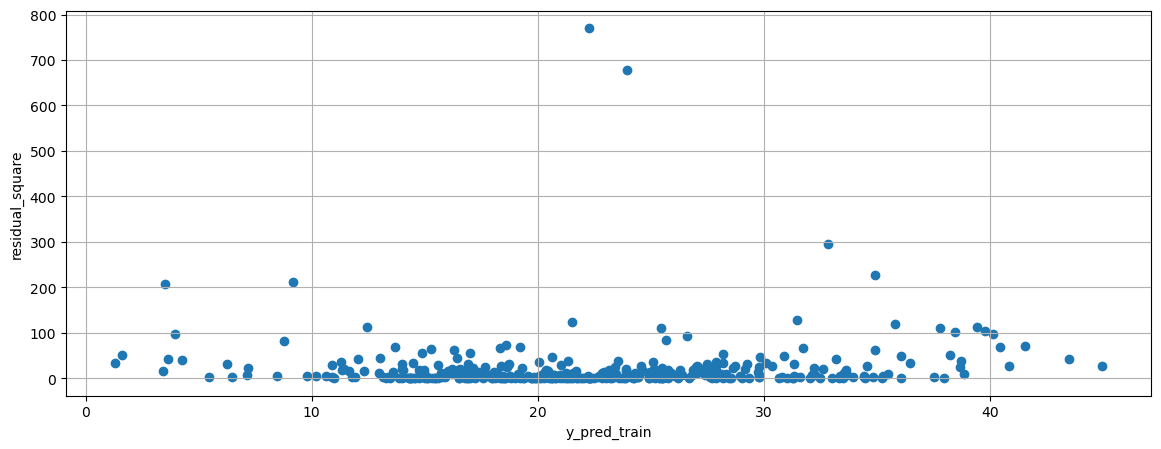

In [88]:
plt.figure(figsize = (14,5))
residual_square = (y_train - y_pred_train)**2
plt.scatter(y_pred_train, residual_square)
plt.xlabel('y_pred_train')
plt.ylabel('residual_square')
plt.grid()

### Normality check for the residual error:

Text(0.5, 0, 'Residual Error')

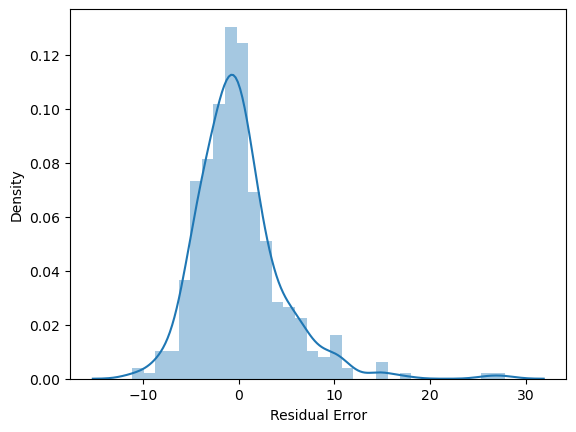

In [89]:
sns.distplot(y_train-y_pred_train)
plt.xlabel('Residual Error')

### Checking relationships b/w DV and IDVs:

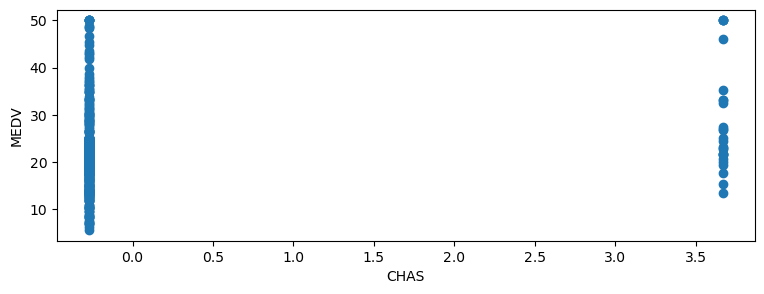

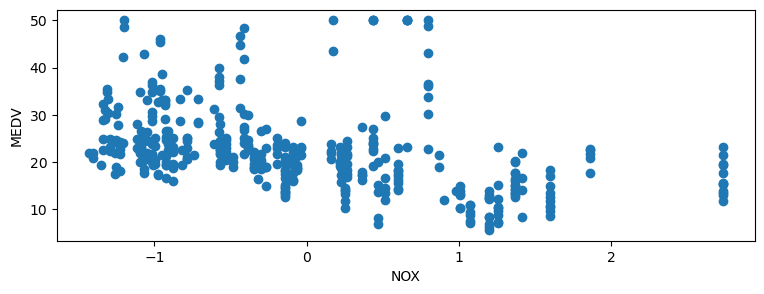

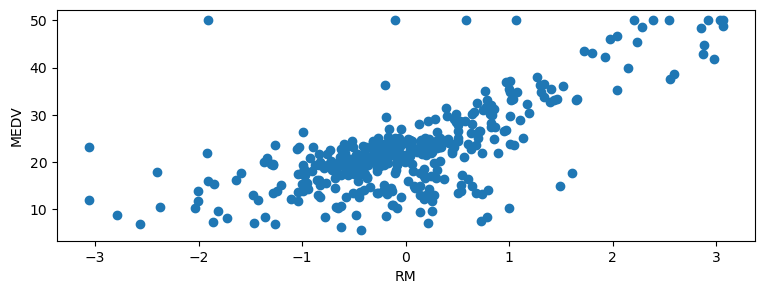

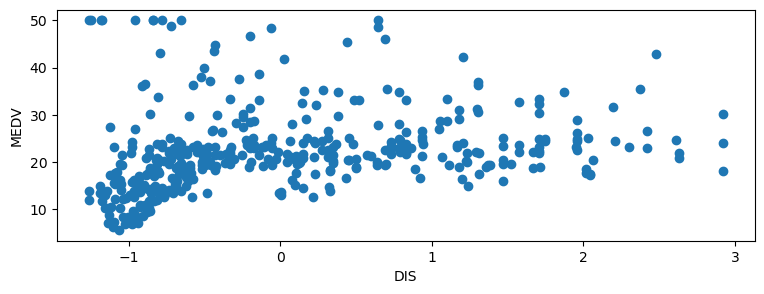

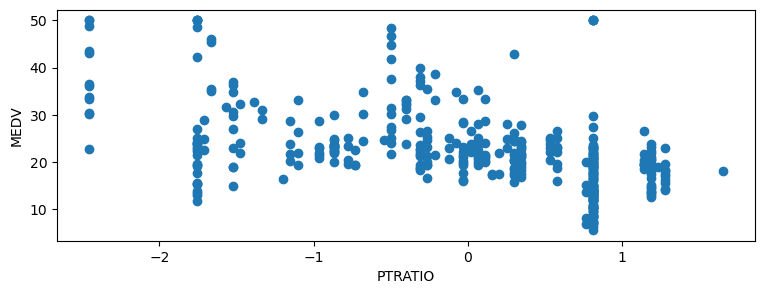

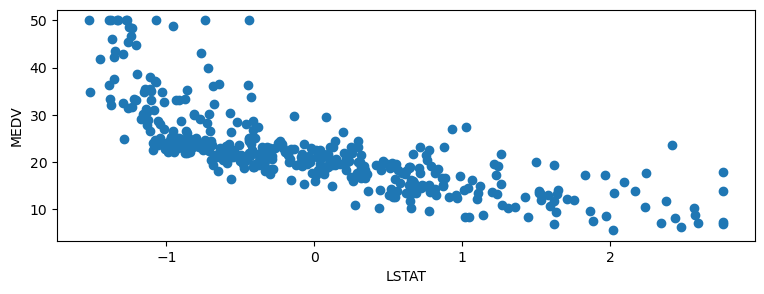

In [90]:
for col in x_train.columns:  
    plt.figure(figsize = (9,3))
    plt.scatter(x_train[col], y_train)
    plt.xlabel(col)
    plt.ylabel(y.columns[0])

### Autocorrelation check for the residual error:

From the Regression Summary report **Durbin-Watson** which tests the first order autocorrelation(lag = 1) comes as **1.875** which is close to 2 thus indicating almost no autocorrelation b/w the residuals.

## Applying Polynomial regression:

### About Polynomial Regression:

Polynomial Regression allows us to find a function that fits the non-linear relationship b/w DV and IDVs.

Let the degree of the Polynomial Regression be 2 and let there be 2 IDVs x1, x2 and one DV y.

**Equation for the population regression line for polynomial case:**

   __y = beta_0 + x1 * beta_1 + x2 * beta_2 + x1^2 * beta_3 + x1 * x2 * beta_4 + x2^2 * beta_5 + epsilon__, epsilon is the random error occuring during measurement of the DV y.
    
**Equation for the sample regression line for polynomial case:**
    
   __y_hat = beta_0_hat + x1 * beta_1_hat + x2 * beta_2_hat + x1^2 * beta_3_hat + x1 * x2 * beta_4_hat + x2^2 * beta_5_hat__

In [91]:
from sklearn.preprocessing import PolynomialFeatures

'''
    Using heuristic approach we came to degree=3 as the hyperparameter value for degree.
'''
poly = PolynomialFeatures(degree = 2)

In [92]:
x_train

,CHAS,NOX,RM,DIS,PTRATIO,LSTAT
288,-0.272599,-1.293115,0.044191,1.708769,-0.870216,-0.714991
72,-0.272599,-1.224009,-0.318927,0.727059,0.343713,-1.011715
471,-0.272599,-0.196047,-0.080721,-0.331112,0.810609,0.036804
176,-0.272599,-0.386091,-0.384288,-0.110773,-0.870216,-0.356926
320,-0.272599,-0.532942,0.205415,0.365839,0.530471,-0.772053
...,...,...,...,...,...,...
63,-0.272599,-0.878475,0.693446,2.029750,0.577161,-0.443946
326,-0.272599,-0.532942,0.039834,0.789253,0.530471,-0.921842
337,-0.272599,-0.342899,-0.565847,0.885543,0.810609,-0.292731
11,-0.272599,-0.265154,-0.400265,1.181376,-1.523871,0.093866


In [93]:
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.fit_transform(x_test)

In [94]:
x_train_trans.shape

(404, 28)

In [95]:
x_test_trans.shape

(102, 28)

In [96]:
linear_model_2 = LinearRegression()
linear_model_2.fit(x_train_trans, y_train)

LinearRegression()

In [97]:
y_pred_train_trans = linear_model_2.predict(x_train_trans)
y_pred_test_trans = linear_model_2.predict(x_test_trans)

In [98]:
r2_score(y_train, y_pred_train_trans)

0.8693269284200376

In [99]:
r2_score(y_test, y_pred_test_trans)

0.7880534925286308

In [100]:
print(y_pred_test_trans)

[[44.671875  ]
 [29.90136719]
 [16.51855469]
 [14.796875  ]
 [27.99609375]
 [31.2109375 ]
 [45.05859375]
 [13.55273438]
 [36.13867188]
 [ 9.703125  ]
 [24.07617188]
 [12.13867188]
 [19.04296875]
 [19.45214844]
 [25.08007812]
 [22.96679688]
 [10.49511719]
 [30.95703125]
 [29.30664062]
 [24.76855469]
 [10.2265625 ]
 [18.64746094]
 [26.05273438]
 [29.3671875 ]
 [32.58496094]
 [17.28320312]
 [29.67382812]
 [16.79199219]
 [35.18945312]
 [36.84082031]
 [20.3828125 ]
 [19.46386719]
 [37.64746094]
 [42.92382812]
 [31.17480469]
 [20.8046875 ]
 [13.54101562]
 [17.61523438]
 [ 7.62988281]
 [30.59960938]
 [21.29003906]
 [22.83398438]
 [40.5546875 ]
 [12.71875   ]
 [16.89355469]
 [24.61328125]
 [32.44335938]
 [14.07910156]
 [25.82714844]
 [30.11523438]
 [34.24902344]
 [42.86132812]
 [20.79980469]
 [25.5390625 ]
 [32.71386719]
 [13.67578125]
 [19.99707031]
 [16.13476562]
 [20.92382812]
 [22.92382812]
 [31.86816406]
 [10.88085938]
 [35.80273438]
 [23.41308594]
 [10.57910156]
 [24.44140625]
 [22.95800

In [101]:
print(y_test)

     MEDV
195  50.0
4    36.2
434  11.7
458  14.9
39   30.8
..    ...
227  31.6
405   5.0
69   20.9
231  31.7
104  20.1

[102 rows x 1 columns]


## Conclusion:

### Using Polynomial regression of degree 2 gives us the best accuracy for both test and train data.
 - ### Train Accuracy: 86.93%
 - ### Test Accuracy: 78.81%
 
### Variables that are significant in predicting the DV 'MEDV' are :
- CHAS
- NOX
- RM
- DIS
- PTRATIO
- LSTAT